<a href="https://colab.research.google.com/github/thanktua-spp/machine-learning-fundamentals/blob/main/Polynomial_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Concept Development

## 1. Toy Data Generation and Visualization

In this introductory Section, we will generate a set of toy data set with linear relationship easy enough to train a simple linear regression model algorithm.


# 1.1 Import packages

Two very standard packages used for numeric computing are,

*   Numpy: A numeric computing library for easy array manipulation https://numpy.org/. 

*   Matplotlib: A plotting and visualization library https://matplotlib.org/.



In [ ]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Create Toy data

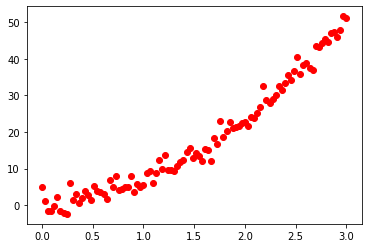

In [ ]:
x = np.linspace(0, 3, 100)
mu, sigma = 0, 2 # mean and standard deviation
noise = np.random.normal(mu, sigma, 100)
y = 2*x + 5*(x**2) + noise

plt.plot(x, y, 'ro')
plt.show()

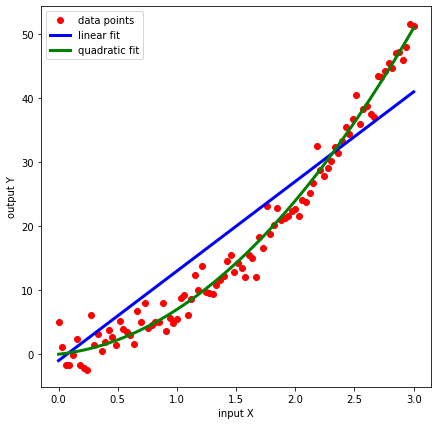

In [ ]:
plt.figure(figsize=(7,7))
x_lin = np.linspace(0,3,100)
y_lin = 14*x_lin - 1
y_quad =  2* x_lin + 5*(x_lin**2)

plt.plot(x, y, 'ro', label='data points')
plt.plot(x_lin, y_lin, 'b', lw=3, label='linear fit')
plt.plot(x_lin, y_quad, 'g', lw=3, label='quadratic fit')
plt.xlabel('input X')
plt.ylabel('output Y')
plt.legend()
plt.show()
#plt.savefig('polynomial_reg.png', dpi=100)

In [ ]:
w1 = 0
w2 = 0
W = np.array([[w1], [w2]])
W

array([[0],
       [0]])

In [ ]:
# Initialize parameters
W = np.zeros((2,1))
W

array([[0.],
       [0.]])

In [ ]:
t = np.zeros(x.shape)
np.append([x], [t**2], axis=1).shape

(1, 200)

In [ ]:
x = x.reshape(-1,1)
X = np.hstack((x, x**2))
X[-10:]

array([[2.72727273, 7.43801653],
       [2.75757576, 7.60422406],
       [2.78787879, 7.77226814],
       [2.81818182, 7.94214876],
       [2.84848485, 8.11386593],
       [2.87878788, 8.28741965],
       [2.90909091, 8.46280992],
       [2.93939394, 8.64003673],
       [2.96969697, 8.81910009],
       [3.        , 9.        ]])

In [ ]:
y = y.reshape(-1, 1)
y.shape

(100, 1)

In [ ]:
def compute_yhat(X, W):
  y_hat = np.matmul(X, W)
  return y_hat

y_hat = compute_yhat(X, W)
print(y_hat.shape)

(100, 1)


In [ ]:
y[-10:]

array([[43.2546765 ],
       [44.2918984 ],
       [45.4784047 ],
       [44.65110569],
       [47.04488932],
       [47.24294113],
       [45.95634808],
       [48.00276754],
       [51.66456754],
       [51.29873603]])

In [ ]:
y_hat[-10:]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Error/Loss calculation
def compute_cost(y, y_hat):
  loss = (y -  y_hat)**2
  cost = 1/y.shape[0] * np.sum(loss)
  return cost

cost = compute_cost(y, y_hat)
print(cost)

554.9714170259408


In [ ]:
# compute the loss derivative
def compute_gradient(X, y, y_hat):
  dcost_dw = -2/y.shape[0] * np.dot(X.T, (y - y_hat))
  return dcost_dw

grads = compute_gradient(X, y, y_hat)
grads

array([[ -52.08012323],
       [-124.2730994 ]])

In [ ]:
# Update the weeight parameter
def update_gradients(grads, W, lr=0.1):
  W = W - lr*grads
  return W
W = update_gradients(grads, W)
W

array([[ 5.70801232],
       [14.22730994]])

In [ ]:
w1 = 0
w2 = 0
W = np.array([[w1], [w2]])
lr=0.01

for i in range(30):
  y_hat = compute_yhat(X, W)
  cost = compute_cost(y, y_hat)
  grads = compute_gradient(X, y, y_hat)
  W = update_gradients(grads, W, lr)
  print(cost)

554.9714170259408
211.5525321726569
82.0877150845271
33.28102248106629
14.88147809249216
7.9450649147014225
5.330115125529992
4.3443053770040825
3.972661969498872
3.832551958109805
3.779727299062011
3.759808204996028
3.7522941463118547
3.7494566683577197
3.7483822359723455
3.7479724810525985
3.7478133317663724
3.7477486877921566
3.747719700983584
3.7477041861023275
3.7476937793890843
3.7476853276180475
3.747677641873423
3.747670273761997
3.747663054059909
3.747655918787984
3.7476488436442223
3.7476418192856107
3.7476348420096532
3.74762791024143
